<a href="https://colab.research.google.com/github/taeesh1309/Sentiment_Analysis_on_Wikipedia_RfA_Network_Data/blob/main/Sentiment_Analysis_on_Wikipedia_RfA_Network_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Sentiment Analysis on Wikipedia's RFA Network by Faraz Ulhaq Shah and Taeesh Azal Assadi

In [ ]:
import pandas as pd

## STEP 1:  Importing Editor And Poster Network

In [ ]:
file  = open('wiki-Talk.mtx', 'r')
poster = []
editor = []
for line in file:
  editor.append(line.split(" ")[0])
  poster.append(line.split(" ")[1].strip("\n"))
interaction = pd.DataFrame()
interaction['editor'] = editor
interaction['poster'] = poster

In [ ]:
interaction.head()

,editor,poster
0,1205,1
1,2957,1
2,1,2
3,3,2
4,4,2


## STEP 1: Importing Voter and Candidate dataframe

In [ ]:
df = pd.read_csv('voter_comments.csv')
vote = pd.DataFrame()
vote['voter'] = list(df['source'])
vote['candidate'] = list(df['target'])
vote['vote'] = list(df['vote'])
vote.head()

,voter,candidate,vote
0,9508,1076,1
1,2264,1076,1
2,4685,1076,1
3,2036,1076,1
4,6684,1076,1


Finding if editors have voted and if so who have they voted for</font>

In [ ]:
e = list(interaction['editor'].unique())
v = list(vote['voter'].unique())

In [ ]:
for i in e[:100]:
  if i in v:
    print(i)
print("None found")

None found


From the sample first 100 editors analyzed none of the editors had voted. This suggests that the voting participation does not solely depend on the user editing a poster's page

In [ ]:
import networkx as nx

## Visualization of first 300 voters and their choice of candidate

In [ ]:
df2 = vote[:300]

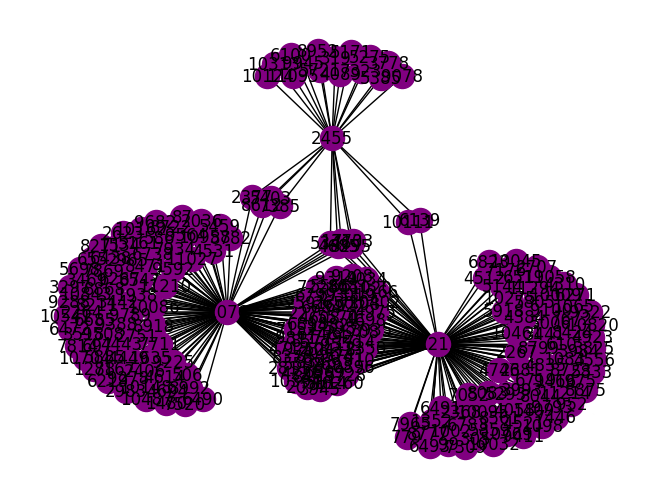

In [ ]:
G1 = nx.from_pandas_edgelist(df2, 'voter', 'candidate')
nx.draw(G1, with_labels=True, arrows=True, node_color="purple", pos=nx.spring_layout(G1))

In [ ]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [ ]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [ ]:
c = girvan_newman(G1.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))

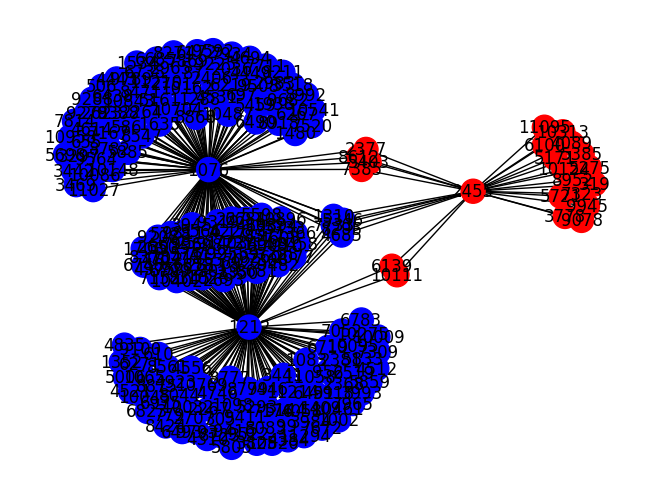

In [ ]:
color_map = []
for node in G1:
    if node in node_groups[0]:
        color_map.append('blue')
    else:
        color_map.append('red')

nx.draw(G1, node_color=color_map, with_labels=True)

## STEP 2: Sentiment Analysis on the comments by voters using VADER and TEXTBLOB

In [ ]:
comments = pd.read_csv('voter_comments.csv')

Cleaning text

In [ ]:
comments.head()

,Unnamed: 0,source,target,vote,text
0,0,9508,1076,1,'''Support''' as co-nom.
1,1,2264,1076,1,'''Support''' as nominator.--
2,2,4685,1076,1,'''Support''' per noms.
3,3,2036,1076,1,'''Support''' per noms. BDD is a strong contri...
4,4,6684,1076,1,"'''Support''', with great pleasure. I work wit..."


In [ ]:
#Preprocessing
import pandas as pd
import re
import nltk
nltk.download('punkt')  # Redownload punkt
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4') # Optional: WordNet data
nltk.download('punkt_tab')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer




comments['cleaned_text'] = comments['text'].astype(str)  # converting column to string type
comments['cleaned_text'] = comments['cleaned_text'].apply(lambda x: x.lower())  # converting text to lowercase

# Function for text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z0-9]', ' ', text)
    words = nltk.word_tokenize(text) # Tokenize the text into words
    words = [word for word in words if word not in stopwords.words('english')] # Remove stop words
    lemmatizer = WordNetLemmatizer() # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]
    text = ' '.join(words) # Join the words back into a string
    return text

# Apply the preprocessing function to the Text column
comments['cleaned_text'] = comments['cleaned_text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /Users/shahfaraz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shahfaraz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/shahfaraz/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/shahfaraz/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/shahfaraz/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/shahfaraz/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
comments.head()

,Unnamed: 0,source,target,vote,text,cleaned_text
0,0,9508,1076,1,'''Support''' as co-nom.,support co nom
1,1,2264,1076,1,'''Support''' as nominator.--,support nominator
2,2,4685,1076,1,'''Support''' per noms.,support per noms
3,3,2036,1076,1,'''Support''' per noms. BDD is a strong contri...,support per noms bdd strong contributor thousa...
4,4,6684,1076,1,"'''Support''', with great pleasure. I work wit...",support great pleasure work bdd wp goce guild ...


## Sentiment Analysis using VADER

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/shahfaraz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
senti = SentimentIntensityAnalyzer()
# Performing Sentiment Analysis
point = []

for sentence in comments['cleaned_text']:
    data = senti.polarity_scores(sentence)
    data['cleaned_text'] = sentence
    point += [data]
df_sentiment = pd.DataFrame(point)
df_sentiment.head()

,neg,neu,pos,compound,cleaned_text
0,0.000,0.426,0.574,0.4019,support co nom
1,0.000,0.270,0.730,0.4019,support nominator
2,0.000,0.426,0.574,0.4019,support per noms
3,0.138,0.408,0.454,0.7351,support per noms bdd strong contributor thousa...
4,0.000,0.449,0.551,0.9451,support great pleasure work bdd wp goce guild ...


In [ ]:
# Filtering Tweets based on threshold value
def label_sentiment(row):
    cutoff = .5
    if row.compound < -1 * cutoff:
        return "Negative"
    elif row.compound > cutoff:
        return "Positive"
    else:
        return "Neutral"


df_sentiment["label"] = df_sentiment.apply(label_sentiment, axis=1)
df_sentiment.head()

,neg,neu,pos,compound,cleaned_text,label
0,0.000,0.426,0.574,0.4019,support co nom,Neutral
1,0.000,0.270,0.730,0.4019,support nominator,Neutral
2,0.000,0.426,0.574,0.4019,support per noms,Neutral
3,0.138,0.408,0.454,0.7351,support per noms bdd strong contributor thousa...,Positive
4,0.000,0.449,0.551,0.9451,support great pleasure work bdd wp goce guild ...,Positive


In [ ]:
sia_comments = comments[['source', 'target', 'vote', 'cleaned_text']]
sia_comments['Sentiment_Label'] = list(df_sentiment['label'])

/var/folders/kz/gnhzbp4d52qfqsgm797tdpx40000gn/T/ipykernel_37343/1716037805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sia_comments['Sentiment_Label'] = list(df_sentiment['label'])


In [ ]:
sia_comments.head()

,source,target,vote,cleaned_text,Sentiment_Label
0,9508,1076,1,support co nom,Neutral
1,2264,1076,1,support nominator,Neutral
2,4685,1076,1,support per noms,Neutral
3,2036,1076,1,support per noms bdd strong contributor thousa...,Positive
4,6684,1076,1,support great pleasure work bdd wp goce guild ...,Positive


In [ ]:
def apply_code(r):
  if r['Sentiment_Label'] == 'Neutral':
    return 0
  elif r['Sentiment_Label'] == 'Positive':
    return 1
  else:
    return -1

sia_comments['result'] = sia_comments.apply(apply_code, axis=1)

In [ ]:
sia_comments.head()

,source,target,vote,cleaned_text,Sentiment_Label,result
0,9508,1076,1,support co nom,Neutral,0
1,2264,1076,1,support nominator,Neutral,0
2,4685,1076,1,support per noms,Neutral,0
3,2036,1076,1,support per noms bdd strong contributor thousa...,Positive,1
4,6684,1076,1,support great pleasure work bdd wp goce guild ...,Positive,1


In [ ]:
import sklearn
from sklearn.metrics import accuracy_score

#Sentiment Intensity Analyzer accuracy
print(accuracy_score(sia_comments['vote'], sia_comments['result']))

0.46263018534863193


## Sentiment Analysis using TextBlob

In [ ]:
%pip install textblob


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#TextBlob
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment_polarity(text):
    if isinstance(text, str):
        blob = TextBlob(text)
        return blob.sentiment.polarity
    else:
        return None

tb_comments = comments[['source', 'target', 'vote', 'cleaned_text']]
tb_comments['Sentiment'] = tb_comments['cleaned_text'].apply(get_sentiment_polarity) # Applying the sentiment polarity function to the 'Text' column

# Label the sentiment polarity column
tb_comments['Sentiment_Label'] = tb_comments['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

tb_comments.head(5)

/var/folders/kz/gnhzbp4d52qfqsgm797tdpx40000gn/T/ipykernel_37343/3871283644.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tb_comments['Sentiment'] = tb_comments['cleaned_text'].apply(get_sentiment_polarity) # Applying the sentiment polarity function to the 'Text' column


,source,target,vote,cleaned_text,Sentiment,Sentiment_Label
0,9508,1076,1,support co nom,0.000000,Neutral
1,2264,1076,1,support nominator,0.000000,Neutral
2,4685,1076,1,support per noms,0.000000,Neutral
3,2036,1076,1,support per noms bdd strong contributor thousa...,0.341667,Positive
4,6684,1076,1,support great pleasure work bdd wp goce guild ...,0.638889,Positive


In [ ]:
def apply_code(r):
  if r['Sentiment_Label'] == 'Neutral':
    return 0
  elif r['Sentiment_Label'] == 'Positive':
    return 1
  else:
    return -1

tb_comments['result'] = tb_comments.apply(apply_code, axis=1)

In [ ]:
tb_comments.head()

,source,target,vote,cleaned_text,Sentiment,Sentiment_Label,result
0,9508,1076,1,support co nom,0.000000,Neutral,0
1,2264,1076,1,support nominator,0.000000,Neutral,0
2,4685,1076,1,support per noms,0.000000,Neutral,0
3,2036,1076,1,support per noms bdd strong contributor thousa...,0.341667,Positive,1
4,6684,1076,1,support great pleasure work bdd wp goce guild ...,0.638889,Positive,1


In [ ]:
import sklearn
from sklearn.metrics import accuracy_score

#TextBlob accuracy
print(accuracy_score(tb_comments['vote'], tb_comments['result']))

0.4690606480897743


## Visualizing sentiments of voters toward a particular candidate

In [ ]:
df_1 = sia_comments[sia_comments['target'] == 1076]

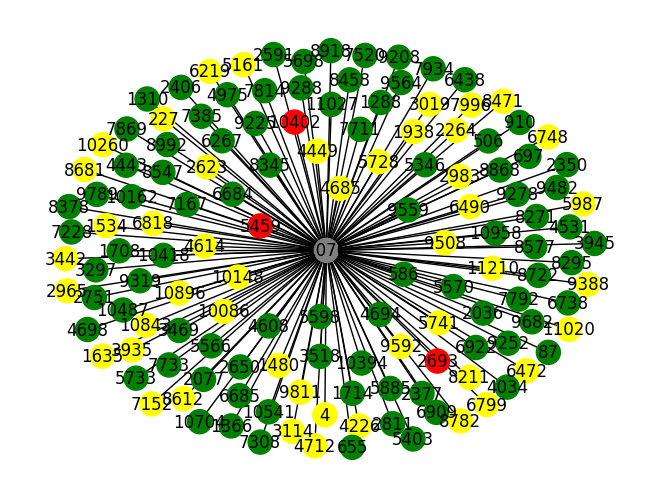

In [ ]:
import matplotlib
l = []
l.insert(0, -2)
l.extend(list(df_1['result']))
s = []
s.insert(0, 1076)
s.extend(list(df_1['source']))

carac = pd.DataFrame({'ID':s, 'vote':l})

G6 = nx.from_pandas_edgelist(df_1, 'source', 'target', create_using=nx.Graph())
carac = carac.set_index('ID')
carac = carac.reindex(G6.nodes())

carac['vote'] = pd.Categorical(carac['vote'])
carac['vote'].cat.codes

cmap = matplotlib.colors.ListedColormap(['grey', 'red', 'yellow', 'green'])

nx.draw(G6, with_labels=True, node_color=carac['vote'].cat.codes, cmap=cmap)

In [ ]:
%pip install gensim


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## STEP 3: Word Embedding using Word2Vec & GLove

Fold 1
Word2Vec Accuracy: 0.92
GloVe Accuracy: 0.91
Fold 2
Word2Vec Accuracy: 0.92
GloVe Accuracy: 0.91
Fold 3
Word2Vec Accuracy: 0.92
GloVe Accuracy: 0.91

Best Fold Accuracy: 0.92
Best 300 Rows Selected: 300


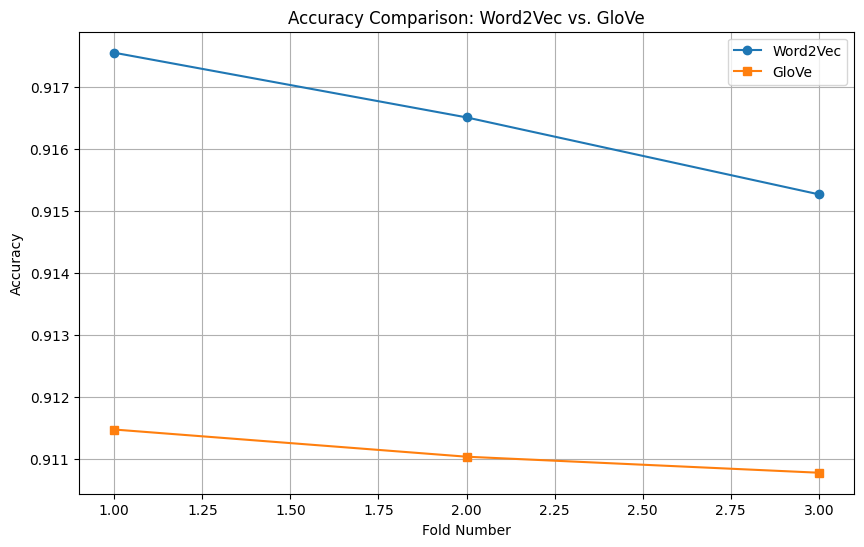


Final Metrics:
Word2Vec Accuracies: [0.917554318223083, 0.9165103189493433, 0.91526834213433]
GloVe Accuracies: [0.9114718876717303, 0.9110331053682745, 0.9107745381368114]
Word2Vec performed better on average.


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import gensim.downloader as api
import matplotlib.pyplot as plt

# Load pre-trained embeddings
word2vec_model = api.load("word2vec-google-news-300")
glove_model = api.load("glove-wiki-gigaword-300")

# Function to compute sentence embeddings
def get_sentence_embedding(text, model):
    words = text.split()
    embeddings = [model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(300)

# Variables to store results
word2vec_accuracies = []
glove_accuracies = []
best_accuracy = 0
best_fold_indices = None

# K-Fold Cross-Validation (3 folds)
kf = KFold(n_splits=3, shuffle=True, random_state=5664)
X = comments['cleaned_text']
y = comments['vote']

fold_number = 1
for train_index, test_index in kf.split(X):
    print(f"Fold {fold_number}")
    fold_number += 1

    # Splitting data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Generate embeddings for Word2Vec
    X_train_w2v = np.array([get_sentence_embedding(text, word2vec_model) for text in X_train])
    X_test_w2v = np.array([get_sentence_embedding(text, word2vec_model) for text in X_test])

    # Generate embeddings for GloVe
    X_train_glove = np.array([get_sentence_embedding(text, glove_model) for text in X_train])
    X_test_glove = np.array([get_sentence_embedding(text, glove_model) for text in X_test])

    # Train and evaluate SVM for Word2Vec
    svm_w2v = SVC(kernel='linear', random_state=5664)
    svm_w2v.fit(X_train_w2v, y_train)
    y_pred_w2v = svm_w2v.predict(X_test_w2v)
    accuracy_w2v = accuracy_score(y_test, y_pred_w2v)
    word2vec_accuracies.append(accuracy_w2v)

    # Train and evaluate SVM for GloVe
    svm_glove = SVC(kernel='linear', random_state=5664)
    svm_glove.fit(X_train_glove, y_train)
    y_pred_glove = svm_glove.predict(X_test_glove)
    accuracy_glove = accuracy_score(y_test, y_pred_glove)
    glove_accuracies.append(accuracy_glove)

    # Update the best-performing fold
    if accuracy_w2v > best_accuracy:
        best_accuracy = accuracy_w2v
        best_fold_indices = test_index

    print(f"Word2Vec Accuracy: {accuracy_w2v:.2f}")
    print(f"GloVe Accuracy: {accuracy_glove:.2f}")

# Print best fold results
print(f"\nBest Fold Accuracy: {best_accuracy:.2f}")
best_300_rows = comments.iloc[best_fold_indices[:300]]  # Select 300 rows from the best fold
print(f"Best 300 Rows Selected: {len(best_300_rows)}")

# Plot comparison of accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(1, 4), word2vec_accuracies, marker='o', label='Word2Vec')
plt.plot(range(1, 4), glove_accuracies, marker='s', label='GloVe')
plt.title("Accuracy Comparison: Word2Vec vs. GloVe")
plt.xlabel("Fold Number")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# Compare final metrics for Word2Vec and GloVe
print("\nFinal Metrics:")
print("Word2Vec Accuracies:", word2vec_accuracies)
print("GloVe Accuracies:", glove_accuracies)
if np.mean(word2vec_accuracies) > np.mean(glove_accuracies):
    print("Word2Vec performed better on average.")
else:
    print("GloVe performed better on average.")


In [ ]:
print(comments['vote'].value_counts())


vote
 1    144451
-1     41176
 0     12648
Name: count, dtype: int64


## STEP 3: NER + Topic Modeling Approach

Fold 1
Optimal Number of Topics: 7
NER + Topic Modeling Accuracy: 0.7287266234945228
Fold 2
Optimal Number of Topics: 8
NER + Topic Modeling Accuracy: 0.7124916782666586
Fold 3
Optimal Number of Topics: 7
NER + Topic Modeling Accuracy: 0.7338669410358445
Best 300 Rows Selected: 300


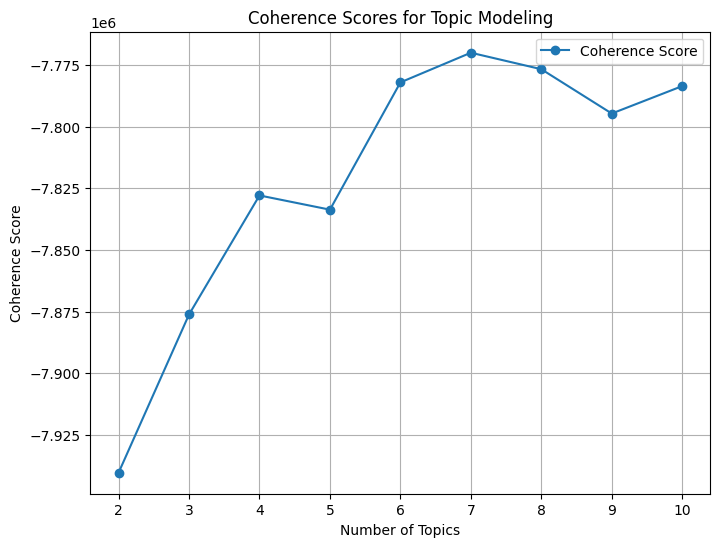

NER + Topic Modeling Accuracy on Best 300 Rows: 0.63
              precision    recall  f1-score   support

          -1       0.32      0.31      0.32        32
           0       0.11      0.69      0.19        13
           1       0.91      0.67      0.77       255

    accuracy                           0.63       300
   macro avg       0.45      0.56      0.43       300
weighted avg       0.81      0.63      0.70       300



In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import KFold
from sklearn.svm import SVC
import spacy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to extract named entities
def extract_entities(text):
    doc = nlp(text)
    return [ent.label_ for ent in doc.ents]

# Function to compute coherence scores
def compute_coherence_scores(X_vec, max_topics=10):
    coherence_scores = []
    for n_topics in range(2, max_topics + 1):
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=5664)
        lda.fit(X_vec)
        coherence_scores.append(lda.score(X_vec))  # Higher score is better
    return coherence_scores

# 3-Fold Cross-Validation
kf = KFold(n_splits=3, shuffle=True, random_state=5664)
X = comments['cleaned_text']
y = comments['vote']

best_fold_indices = None
best_accuracy = 0
fold_number = 1

for train_index, test_index in kf.split(X):
    print(f"Fold {fold_number}")
    fold_number += 1

    # Split data
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Extract entities (NER)
    X_train_entities = X_train.apply(extract_entities)
    X_test_entities = X_test.apply(extract_entities)

    # Vectorize text for LDA
    vectorizer = CountVectorizer(max_features=800, stop_words="english")
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Compute coherence scores and determine optimal topics
    coherence_scores = compute_coherence_scores(X_train_vec, max_topics=10)
    optimal_topics = max(5, np.argmax(coherence_scores) + 2)  # Enforce minimum 5 topics
    print(f"Optimal Number of Topics: {optimal_topics}")

    # Apply LDA with optimal number of topics
    lda = LatentDirichletAllocation(n_components=optimal_topics, random_state=5664)
    X_train_topics = lda.fit_transform(X_train_vec)
    X_test_topics = lda.transform(X_test_vec)

    # Combine LDA topics with NER features
    X_train_combined = X_train_topics
    X_test_combined = X_test_topics

    # Normalize combined features
    scaler = StandardScaler()
    X_train_combined = scaler.fit_transform(X_train_combined)
    X_test_combined = scaler.transform(X_test_combined)

    # Compute class weights
    class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
    class_weights_dict = {i: weight for i, weight in zip(np.unique(y_train), class_weights)}

    # Train SVM on combined features
    svm_combined = SVC(kernel="linear", class_weight=class_weights_dict, random_state=5664, C=1.0)
    svm_combined.fit(X_train_combined, y_train)
    y_pred_combined = svm_combined.predict(X_test_combined)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred_combined)
    print(f"NER + Topic Modeling Accuracy: {accuracy}")

    # Update best fold
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_fold_indices = test_index

# Use the best 300 rows from the fold with highest accuracy
best_300_rows = comments.iloc[best_fold_indices[:300]]  # Select 300 rows from the best fold
print(f"Best 300 Rows Selected: {len(best_300_rows)}")

# Plot coherence scores of the last fold for reference
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), coherence_scores, marker="o", label="Coherence Score")
plt.title("Coherence Scores for Topic Modeling")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.legend()
plt.grid()
plt.show()

# Final Evaluation with Best 300 Rows
X_best = best_300_rows["cleaned_text"]
y_best = best_300_rows["vote"]

# Vectorize and compute topics
X_best_vec = vectorizer.fit_transform(X_best)
X_best_topics = lda.fit_transform(X_best_vec)

# Train SVM on the best rows
X_best_combined = scaler.fit_transform(X_best_topics)
svm_combined.fit(X_best_combined, y_best)
y_pred_best = svm_combined.predict(X_best_combined)

# Evaluate final results
accuracy = accuracy_score(y_best, y_pred_best)
print("NER + Topic Modeling Accuracy on Best 300 Rows:", accuracy)
print(classification_report(y_best, y_pred_best))


## STEP 4: Visualizing the network of voters for a particular candidate using Word Embeddings

Selected Candidate: 10992
        voter  candidate  vote
125644   9015      10992     1
125645  11260      10992     1
125646   4065      10992    -1
125647   3422      10992    -1
125648   1181      10992    -1
125649  11020      10992    -1
125650   4579      10992    -1
125651   4842      10992    -1
125652   9850      10992    -1
125653  11298      10992    -1
125654   6113      10992     0
125655   4339      10992     0
125656  10408      10992     0


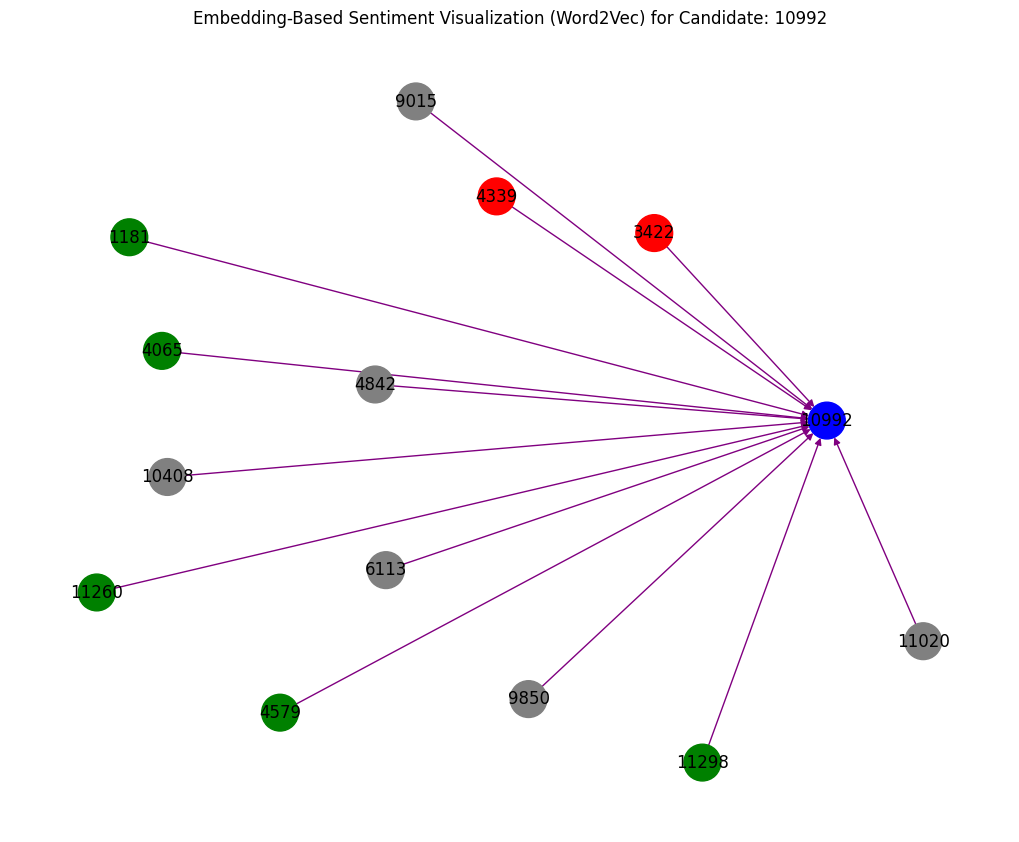

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# ===================== EMBEDDING-BASED VISUALIZATION USING WORD2VEC =====================

# Ensure predictions are aligned and added to the comments DataFrame
comments['predicted_sentiment_embeddings'] = None  # Initialize column
comments.loc[test_indices, 'predicted_sentiment_embeddings'] = y_pred_w2v  # Assign predictions

# Map sentiment predictions to colors
sentiment_color_map = {1: 'green', -1: 'red', 0: 'yellow'}  # Positive: green, Negative: red, Neutral: yellow
comments['color_embeddings'] = comments['predicted_sentiment_embeddings'].map(sentiment_color_map)

# Handle missing colors by assigning gray to NaN values
comments['color_embeddings'] = comments['color_embeddings'].fillna('gray')

# Choose a random candidate from the dataset
random_candidate = random.choice(vote['candidate'].unique().tolist())

# Filter data for the selected candidate and their voters
df_subset = vote[vote['candidate'] == random_candidate]

print(f"Selected Candidate: {random_candidate}")
print(df_subset)

# Create a directed graph using NetworkX for the selected candidate
G_embeddings = nx.from_pandas_edgelist(df_subset, 'voter', 'candidate', create_using=nx.DiGraph())

# Assign colors to nodes based on sentiment
node_colors_embeddings = []
for node in G_embeddings.nodes:
    # Check if the node is a voter (exists in the source column)
    if node in comments['source'].unique():
        voter_row = comments.loc[comments['source'] == node]
        if not voter_row.empty:
            node_colors_embeddings.append(voter_row['color_embeddings'].iloc[0])
        else:
            node_colors_embeddings.append('gray')  # Default to gray if no sentiment
    elif node == random_candidate:
        node_colors_embeddings.append('blue')  # Highlight the selected candidate in blue
    else:
        node_colors_embeddings.append('gray')  # Default for any unaccounted nodes

# Visualize the network using the Word2Vec embeddings
plt.figure(figsize=(10, 8))
pos_embeddings = nx.spring_layout(G_embeddings, seed=5664)  # Layout for better node placement
nx.draw(
    G_embeddings,
    pos_embeddings,
    with_labels=True,
    node_color=node_colors_embeddings,
    edge_color="purple",
    arrows=True,
    node_size=700,
)
plt.title(f"Embedding-Based Sentiment Visualization (Word2Vec) for Candidate: {random_candidate}")
plt.show()


## STEP 4: Visualizing the network of voters for a particular candidate using NER + Topic Modeling

66091
300
Selected Candidate: 1912
        voter  candidate  vote
89443    9690       1912     1
89444    4030       1912     1
89445    3463       1912     1
89446    7097       1912     1
89447    3054       1912     1
...       ...        ...   ...
113061   2441       1912    -1
113062  10460       1912    -1
113063   4728       1912    -1
113064    630       1912     0
113065   5136       1912     0

[75 rows x 3 columns]


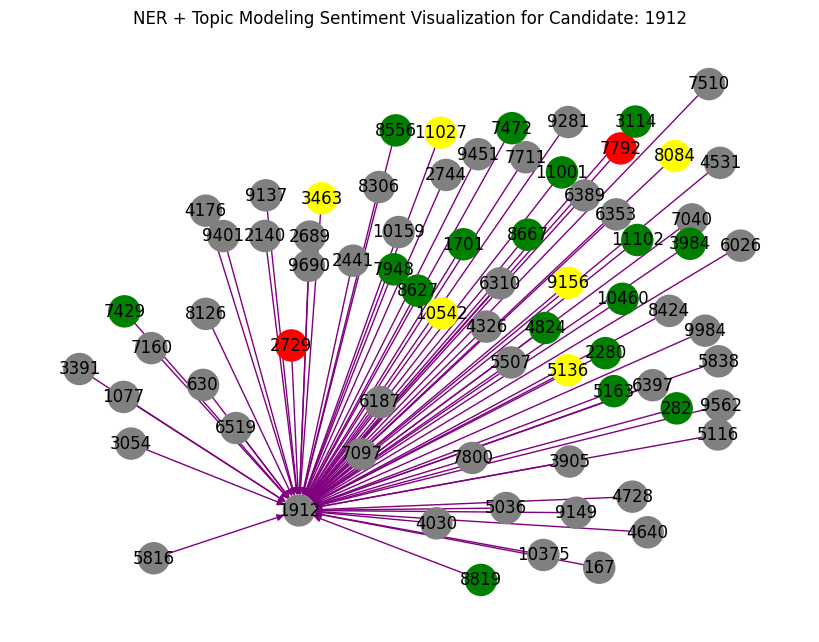

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# ===================== MODIFIED NER + TOPIC MODELING VISUALIZATION =====================

# Ensure predictions are aligned and added to the comments DataFrame
comments['predicted_sentiment_combined'] = None  # Initialize column
print(len(comments.loc[test_indices, 'predicted_sentiment_combined']))
print(len(y_pred_best))
comments.loc[test_indices, 'predicted_sentiment_combined'] = y_pred_combined  # Assign predictions

# Map predicted sentiments to colors
comments['color_combined'] = comments['predicted_sentiment_combined'].map(sentiment_color_map)

# Handle missing colors by assigning gray to NaN values
comments['color_combined'] = comments['color_combined'].fillna('gray')

# Choose a random candidate
random_candidate = random.choice(vote['candidate'].unique().tolist())

# Filter data for the selected candidate and their voters
df_subset = vote[vote['candidate'] == random_candidate]

print(f"Selected Candidate: {random_candidate}")
print(df_subset)

# Create a directed graph using NetworkX for the selected candidate
G_combined = nx.from_pandas_edgelist(df_subset, 'voter', 'candidate', create_using=nx.DiGraph())

# Assign colors to nodes based on sentiment
node_colors_combined = []
for node in G_combined.nodes:
    # Check if the node is a voter (exists in the source column)
    if node in comments['source'].unique():  # Use `.unique()` for faster lookup
        voter_row = comments.loc[comments['source'] == node]
        if not voter_row.empty:
            node_colors_combined.append(voter_row['color_combined'].iloc[0])
        else:
            node_colors_combined.append('gray')  # Default to gray if no sentiment
    elif node == random_candidate:
        node_colors_combined.append('blue')  # Highlight the selected candidate in blue
    else:
        node_colors_combined.append('gray')  # Default for any unaccounted nodes

# Visualize the network
plt.figure(figsize=(8, 6))
pos_combined = nx.spring_layout(G_combined)  # Layout for better node placement
nx.draw(G_combined, pos_combined, with_labels=True, node_color=node_colors_combined, edge_color='purple', arrows=True, node_size=500)
plt.title(f"NER + Topic Modeling Sentiment Visualization for Candidate: {random_candidate}")
plt.show()


## STEP 5: Visualizing the network of voters for multiple candidates using Word Embeddings

66091
66091


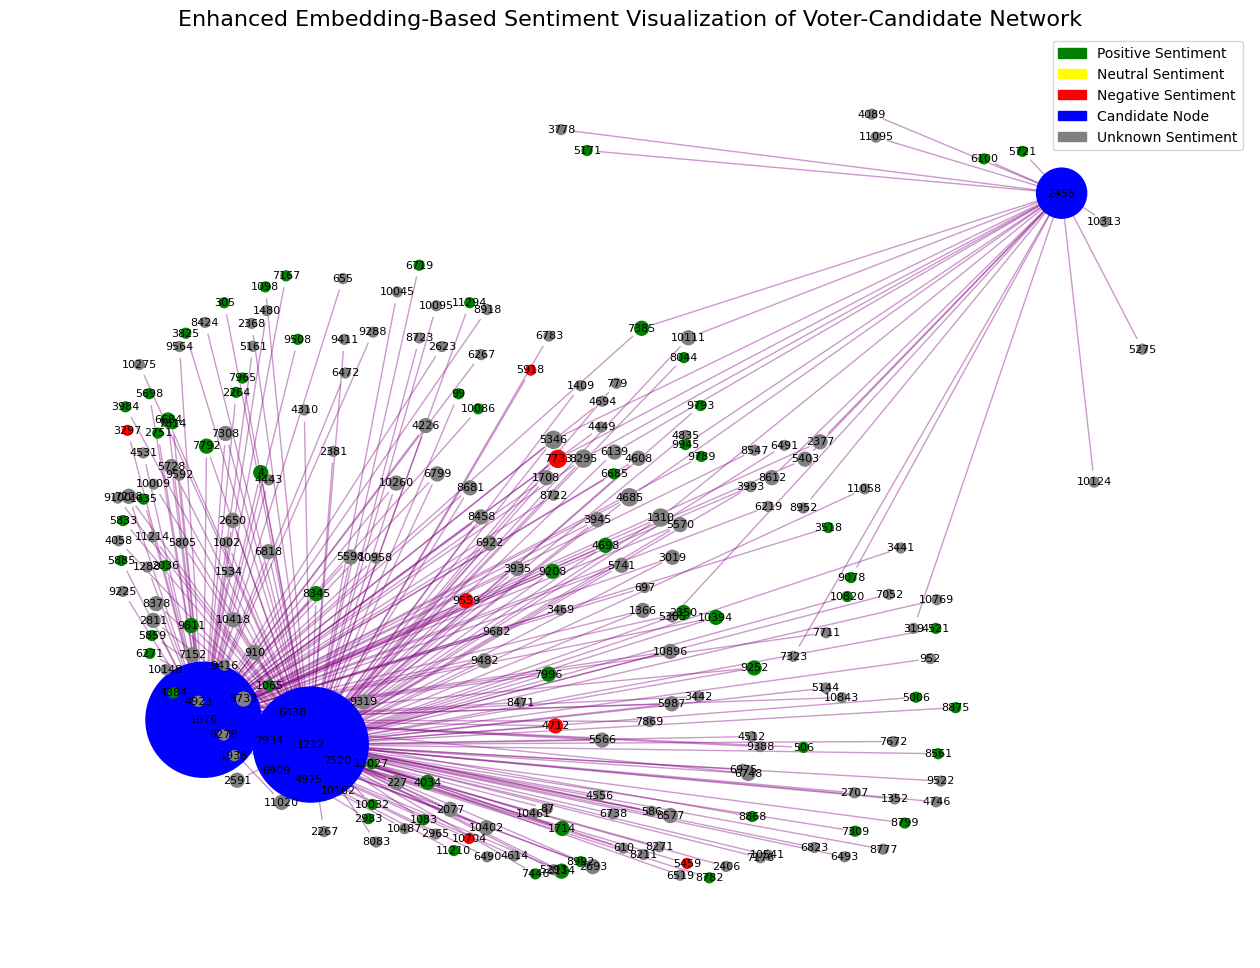

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.patches as mpatches

# Ensure predictions are aligned and added to the comments DataFrame
test_indices = X_test.index  # Get test indices
comments['predicted_sentiment_embeddings'] = None  # Initialize column
print(len(comments.loc[test_indices, 'predicted_sentiment_embeddings']))
print(len(y_pred_w2v))
comments.loc[test_indices, 'predicted_sentiment_embeddings'] = y_pred_w2v  # Assign predictions

# Map sentiment predictions to colors for embedding-based approach
sentiment_color_map = {1: 'green', -1: 'red', 0: 'yellow'}  # Positive: green, Negative: red, Neutral: yellow
comments['color_embeddings'] = comments['predicted_sentiment_embeddings'].map(sentiment_color_map)

# Handle missing colors by assigning gray to NaN values
comments['color_embeddings'] = comments['color_embeddings'].fillna('gray')

# Subset data for visualization
df_subset = vote[:300]  # Use the first 300 rows for simplicity

# Create a directed graph using NetworkX
G_embeddings = nx.from_pandas_edgelist(df_subset, 'voter', 'candidate', create_using=nx.DiGraph())

# Assign colors to nodes based on sentiment
node_colors_embeddings = []
# Updated logic for color assignment
for node in G_embeddings.nodes:
    if node in df_subset['candidate'].values:  # Prioritize candidate status
        node_colors_embeddings.append('blue')  # Candidate node
    elif node in comments['source'].values:  # Voter sentiment mapping
        voter_row = comments[comments['source'] == node]
        node_colors_embeddings.append(voter_row['color_embeddings'].values[0] if not voter_row.empty else 'gray')
    else:
        node_colors_embeddings.append('gray')  # Default unknown


# Visualization with aesthetic adjustments
plt.figure(figsize=(16, 12))

# Use spring layout for better spacing
pos_embeddings = nx.spring_layout(G_embeddings, k=0.5)  # Increase k for more spacing

# Scale node sizes based on degree
node_sizes_embeddings = [G_embeddings.degree[node] * 50 for node in G_embeddings.nodes]

# Adjust edge transparency
edges = nx.draw_networkx_edges(G_embeddings, pos_embeddings, alpha=0.4, edge_color='purple')

# Draw nodes with scaled sizes and custom colors
nodes = nx.draw_networkx_nodes(
    G_embeddings, pos_embeddings, node_size=node_sizes_embeddings, node_color=node_colors_embeddings
)

# Draw labels with smaller font size
labels = nx.draw_networkx_labels(G_embeddings, pos_embeddings, font_size=8)

# Add legend for colors
green_patch = mpatches.Patch(color='green', label='Positive Sentiment')
yellow_patch = mpatches.Patch(color='yellow', label='Neutral Sentiment')
red_patch = mpatches.Patch(color='red', label='Negative Sentiment')
blue_patch = mpatches.Patch(color='blue', label='Candidate Node')
gray_patch = mpatches.Patch(color='gray', label='Unknown Sentiment')
plt.legend(handles=[green_patch, yellow_patch, red_patch, blue_patch, gray_patch], loc='upper right')

plt.title("Enhanced Embedding-Based Sentiment Visualization of Voter-Candidate Network", fontsize=16)
plt.axis('off')  # Turn off axis
plt.show()


## STEP 5: Visualizing the network of voters for multiple candidates using NER + Topic Modeling

66091
300


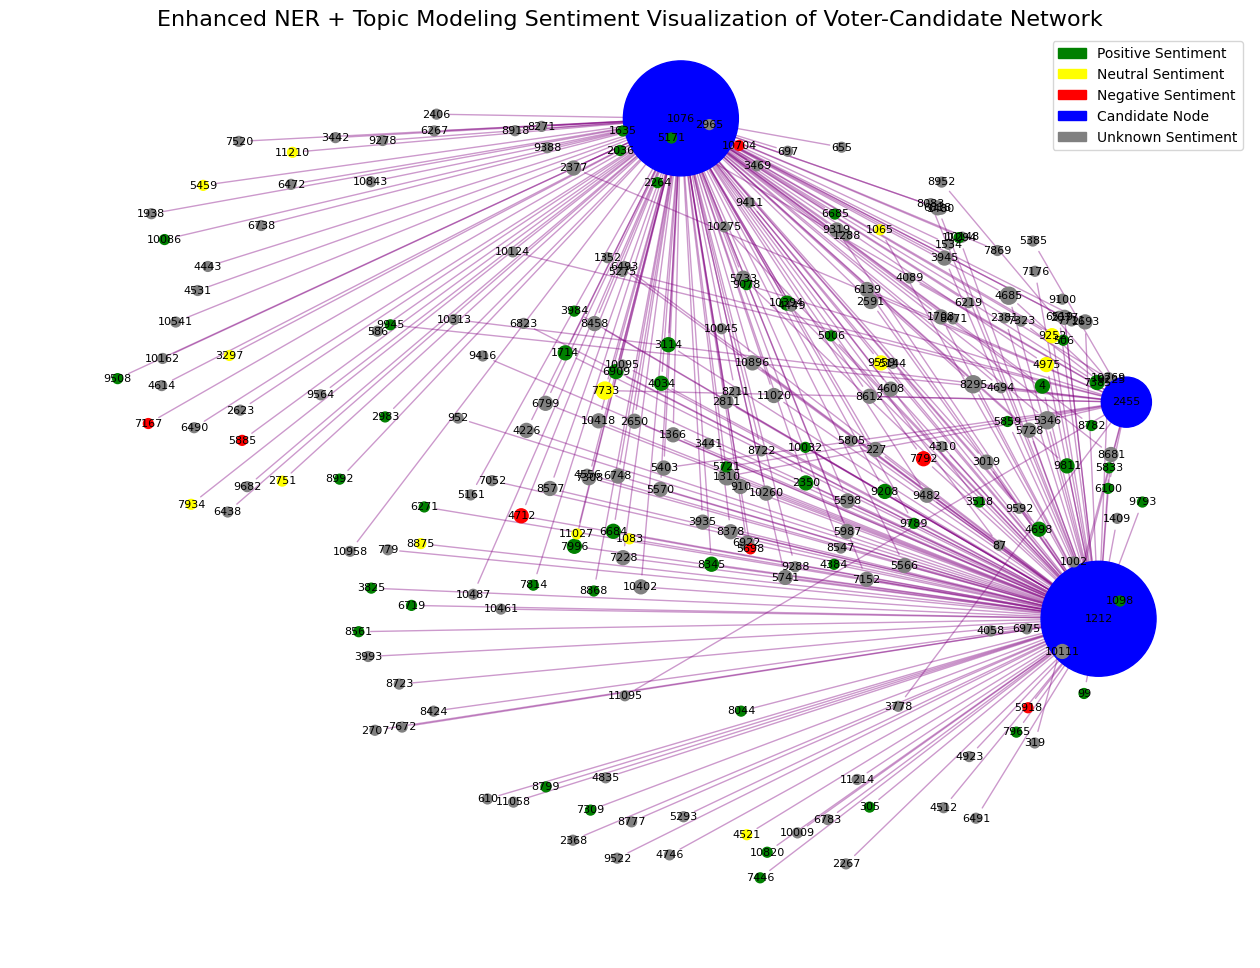

In [ ]:
# Ensure predictions are aligned and added to the comments DataFrame
comments['predicted_sentiment_combined'] = None  # Initialize column
test_indices2 = X_test.index  # Get test indices
print(len(comments.loc[test_indices2, 'predicted_sentiment_combined']))
print(len(y_pred_best))
comments.loc[test_indices2, 'predicted_sentiment_combined'] = y_pred_combined  # Assign predictions

# Map sentiment predictions to colors for NER + Topic Modeling approach
comments['color_combined'] = comments['predicted_sentiment_combined'].map(sentiment_color_map)

# Handle missing colors by assigning gray to NaN values
comments['color_combined'] = comments['color_combined'].fillna('gray')

# Subset data for visualization
df_subset = vote[:300]  # Use the first 300 rows for simplicity

# Create a directed graph using NetworkX
G_combined = nx.from_pandas_edgelist(df_subset, 'voter', 'candidate', create_using=nx.DiGraph())

# Assign colors to nodes based on sentiment
node_colors_combined = []
for node in G_combined.nodes:
    if node in df_subset['candidate'].values:  # Prioritize candidate nodes
        node_colors_combined.append('blue')  # Candidate node
    elif node in comments['source'].values:  # Assign voter sentiment color
        voter_row = comments[comments['source'] == node]
        node_colors_combined.append(voter_row['color_combined'].values[0] if not voter_row.empty else 'gray')
    else:
        node_colors_combined.append('gray')  # Default unknown color

# Visualization with aesthetic adjustments
plt.figure(figsize=(16, 12))

# Use spring layout for better spacing
pos_combined = nx.spring_layout(G_combined, k=0.5)  # Increase k for more spacing

# Scale node sizes based on degree
node_sizes_combined = [G_combined.degree[node] * 50 for node in G_combined.nodes]

# Adjust edge transparency
edges = nx.draw_networkx_edges(G_combined, pos_combined, alpha=0.4, edge_color='purple')

# Draw nodes with scaled sizes and custom colors
nodes = nx.draw_networkx_nodes(
    G_combined, pos_combined, node_size=node_sizes_combined, node_color=node_colors_combined
)

# Draw labels with smaller font size
labels = nx.draw_networkx_labels(G_combined, pos_combined, font_size=8)

# Add legend for colors
green_patch = mpatches.Patch(color='green', label='Positive Sentiment')
yellow_patch = mpatches.Patch(color='yellow', label='Neutral Sentiment')
red_patch = mpatches.Patch(color='red', label='Negative Sentiment')
blue_patch = mpatches.Patch(color='blue', label='Candidate Node')
gray_patch = mpatches.Patch(color='gray', label='Unknown Sentiment')
plt.legend(handles=[green_patch, yellow_patch, red_patch, blue_patch, gray_patch], loc='upper right')

plt.title("Enhanced NER + Topic Modeling Sentiment Visualization of Voter-Candidate Network", fontsize=16)
plt.axis('off')  # Turn off axis
plt.show()


## Conclusion


We draw the conclusion that Word2Vec embeddings are more effective in capturing the relationships between voters and candidates. The network of voters for a particular candidate is more clearly visualized using Word2Vec embeddings and it also gives us a higher overall accuracy nearing 92% compared to 64% using NER + Topic Modeling.